# Math with Python Week 1 Homework
### Bonnie Cooper
### bcooper@sunyopt.edu

#### Chapter1. Programming Challenge 1 page 22, Even-Odd Vending Machine
  
Try writing an “even-odd vending machine,” which will take a number as
input and do two things:
1. Print whether the number is even or odd.
2. Display the number followed by the next 9 even or odd numbers.
If the input is 2, the program should print even and then print 2, 4, 6,
8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should
print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19. 

In [0]:
# a function called evenOrOdd
def evenOrOdd( num ):
  if num % 2 == 0: #if the number is even
    result = 'even'
  elif num % 2 == 1: #if the number is odd
    result = 'odd' 
  #create a list of 10 even numbers from zero to 18
  numSeries = list( range( 0, 20, 2 ) )
  #add 'num' to each member of the list
  result2 = [ x + num for x in numSeries ]
  return result, result2

# test evenOrOdd
#evenOrOdd( 5 )
#evenOrOdd( 0 )
evenOrOdd( 2024 )

('even', [2024, 2026, 2028, 2030, 2032, 2034, 2036, 2038, 2040, 2042])

#### Chapter 2. Programming Challenge 2 page 55, Exploring a Quadratic Function Visually  

Your programming challenge is to enhance this quadratic **equation** program to create
a graph of the function. Try using at least 10 values for x instead of the 6
above. Calculate the corresponding y values using the function and then
create a graph using these two sets of values.
Once you’ve created the graph, spend some time analyzing how the
value of y varies with respect to x. Is the variation linear or nonlinear?

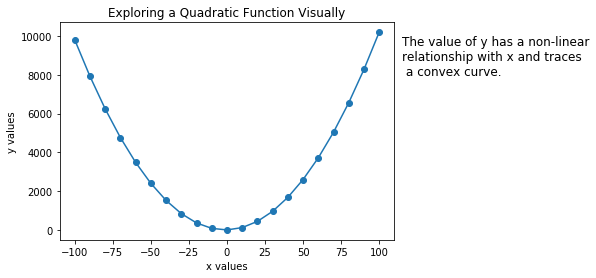

In [0]:
# Assume values of x
x_values = list( range( -100, 110, 10 ) )
y_values = [ ]
for x in x_values:
 # Calculate the value of the quadratic function & append to the list y_values
 y_values.append( x**2 + 2*x + 1 )
 #y_values.append( y )
#print( x_values ) 
#print( y_values )

import matplotlib.pyplot as plt
plt.plot(x_values, y_values, marker='o')
plt.ylabel( 'y values' )
plt.xlabel( 'x values' )
plt.title( 'Exploring a Quadratic Function Visually' )
s = 'The value of y has a non-linear\nrelationship with x and traces\n a convex curve.'
plt.text(115, 8000, s, fontsize=12)
plt.show( )

#### Chapter 3. Programming Challenge 2 page 89, Statistics Calculator  

Implement a statistics calculator that takes a list of numbers in the file
mydata.txt and then calculates and prints their mean, median, mode,
variance, and standard deviation using the functions we wrote earlier in
this chapter.




In [0]:
from collections import Counter

#the directions are vague, I assume this function is to take a list of values as an argument(as opposed to a string that specifies a .txt file)
myData = [ 100, 60, 70, 900,100, 200, 500, 500, 503, 600, 1000, 1200 ]
#the functions from earlier in the chapter:

#MEAN
def calculate_mean(numbers):
 s = sum(numbers)
 N = len(numbers)
 mean = s/N
 return mean

#MEDIAN
def calculate_median(numbers):
 N = len(numbers)
 numbers.sort()
 # Find the median
 if N % 2 == 0:
 # if N is even
  m1 = N/2
  m2 = (N/2) + 1
 # Convert to integer, match position
  m1 = int(m1) - 1
  m2 = int(m2) - 1
  median = (numbers[m1] + numbers[m2])/2
 else:
  m = (N+1)/2
 # Convert to integer, match position
  m = int(m) - 1
  median = numbers[m]
 return median

#MODE
def calculate_mode(numbers):
 c = Counter(numbers)
 numbers_freq = c.most_common()
 max_count = numbers_freq[0][1]
 modes = []
 for num in numbers_freq:
  if num[1] == max_count:
    modes.append(num[0])
 return modes

#VARIANCE
#1st have to find the differences
def find_differences(numbers):
 # Find the mean
 mean = calculate_mean(numbers)
 # Find the differences from the mean
 diff = []
 for num in numbers:
  diff.append(num-mean)
 return diff

def calculate_variance(numbers):
 # Find the list of differences
 diff = find_differences(numbers)
 # Find the squared differences
 squared_diff = []
 for d in diff:
  squared_diff.append(d**2)
 # Find the variance
 sum_squared_diff = sum(squared_diff)
 variance = sum_squared_diff/len(numbers)
 return variance 

#STANDARD DEVIATION
def calculate_std( numbers ):
  # Find the variance of numbers
  var = calculate_variance( numbers )
  std = var**0.5
  return std

#checking to make sure I get the same results as in the text before I build the 
#stats calculator function
#calculate_mean( myData)
#calculate_median( myData )  
#calculate_mode( myData )
#calculate_variance( myData )
#calculate_std( myData )

def statsCalculator( dataList ):
  dataMean = calculate_mean( dataList )
  dataMedian = calculate_median( dataList )  
  dataMode = calculate_mode( dataList )
  dataVar = calculate_variance( dataList )
  dataSTD = calculate_std( dataList )
  return dataMean, dataMedian, dataMode, dataVar, dataSTD 

dataMean, dataMedian, dataMode, dataVar, dataSTD = statsCalculator( myData )
print( ' Mean: {0}\n Median: {1}\n Mode: {2}\n Variance: {3}\n Standard Deviation: {4}\n'.format( dataMean, dataMedian, dataMode, dataVar, dataSTD ) )


 Mean: 477.75
 Median: 500.0
 Mode: [100, 500]
 Variance: 141047.35416666666
 Standard Deviation: 375.5627166887931



#### Chapter 4. Programming Challenge 4 page 117, Solving Single-Variable Inequalities

 For this challenge, create a function, isolve(), that will take
any inequality, solve it, and then return the solution. 
Your challenge is (1) to create a function, isolve(), that
will take any inequality and (2) to choose one of the appropriate functions
discussed in this section to solve it and return the solution. 
When you run your program, it should ask the user to input an inequality expression and print back the solution.

In [0]:
from sympy import Poly, Symbol, solve_poly_inequality, \
solve_rational_inequalities, solve, solve_univariate_inequality, sin, sympify

#define isolve
def isolve( testInequality ):
  x = Symbol( 'x' )
  inequalityOBJ = sympify( testInequality )
  lhs = inequalityOBJ.lhs
  if lhs.is_polynomial( ) == 1:
    print( 'yep, is polynomial' )
    p = Poly( lhs, x )
    rel = inequalityOBJ.rel_op
    solution = solve_poly_inequality( p, rel )
  elif lhs.is_rational_function( ) == 1:
    print( 'totally rational' )
    numer, denom = lhs.as_numer_denom( )
    p1 = Poly( numer )
    p2 = Poly( denom )
    rel = inequalityOBJ.rel_op
    solution =  solve_rational_inequalities( [ [ ( ( p1, p2 ), rel ) ] ] )
  else:
    print( 'something else' )
    try:
      solution = solve_univariate_inequality( inequalityOBJ, x, relational=False )
    except:
      print( 'unable to solve' )
      pass
  return solution
  

#get user input
anyInequality = input( 'Enter a univariate inequality using the variable ''x'' that you would like solved: ')
#callisolve
isolve( anyInequality )

Enter a univariate inequality using the variable x that you would like solved: (2+x)/(3+x) >5
totally rational


Union(Interval.open(-oo, -3), Interval.open(-2, oo))

#### Chapter 5. Programming Challenge 2 page 143, Law of Large Numbers

Thus, for a six-sided die, the expected value of a die roll can be calculated
like this:
> e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)

According to the law of large numbers, the average value of results over
multiple trials approaches the expected value as the number of trials
increases. Your challenge in this task is to verify this law when rolling a
six-sided die for the following number of trials: 100, 1000, 10000, 100000,
and 500000.

In [0]:
from collections import Counter
import numpy as np

trialAverage = [ ]
numTrials = [ 100, 1000, 10000, 100000, 500000 ]
for trial in numTrials:
  newArray = np.random.randint(1, 7, size=(1, trial))
  #print( newArray.size )
  uniqueValues, occurCount = np.unique(newArray, return_counts=True)
  proportions = [a*b for a,b in zip(occurCount/trial,uniqueValues)]
  trialAverage.append( sum( proportions ) )
trialAverage  



[3.58, 3.5610000000000004, 3.5077, 3.50271, 3.501168]

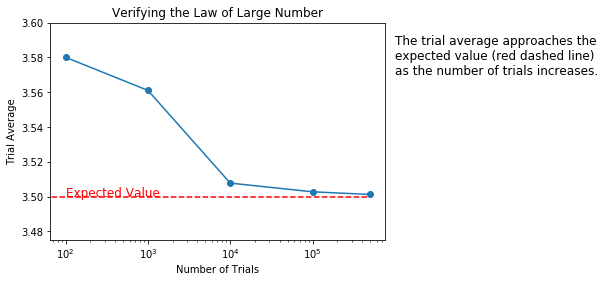

In [0]:
import matplotlib.pyplot as plt
plt.plot(numTrials, trialAverage, marker='o')
plt.hlines( 3.5, 0, 500000, colors='r', linestyles='dashed' )
plt.ylabel( 'Trial Average' )
plt.xlabel( 'Number of Trials' )
plt.title( 'Verifying the Law of Large Number' )
plt.ylim( 3.475, 3.6 )
plt.xscale('log')
s = 'The trial average approaches the\nexpected value (red dashed line)\nas the number of trials increases.'
plt.text(1000000, 3.57, s, fontsize=12)
plt.text( 100, 3.5, 'Expected Value', fontsize=12, color = 'r' )
plt.show( )

#### Chapter 7. Programming Challenge 2 page 205, Implement the Gradient Descent  

Your challenge is to implement a generic program using the gradient
descent algorithm to find the minimum value of a single-variable function
specified as input by the user. The program should also create a graph
of the function and show all the intermediate values it found before finding the minimum. 

In [7]:
'''
Generic gradient descent
'''
import math
from sympy import Derivative, Symbol, sin, sympify

#all we have to do is flip the sign convention on the cost fxn
def grad_descent(x0, f1x, x):
 epsilon = 1e-6
 step_size = 1e-4
 x_old = x0
 #change sign from + to -
 x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
 x_steps = [x_old]
 while abs(x_old - x_new) > epsilon:
  x_old = x_new
  #change sign from + to -
  x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
  x_steps.append( x_new )
 return x_new, x_steps

if __name__ == '__main__':
 f = input('Enter a function in one variable: ')
 var = input('Enter the variable to differentiate with respect to: ')
 var0 = float(input('Enter the initial value of the variable: '))
 try:
  f = sympify(f)
 except SympifyError:
  print('Invalid function entered')
 else:
  var = Symbol(var)
  d = Derivative(f, var).doit()
  var_min, var_steps = grad_descent(var0, d, var)
  print('{0}: {1}'.format(var.name, var_min))
  print('Maximum value: {0}'.format(f.subs({var:var_min})))

Enter a function in one variable:  x**5 - 30*x**3 + 50*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.5
x: -0.757451948244346
Maximum value: -25.0846622548143


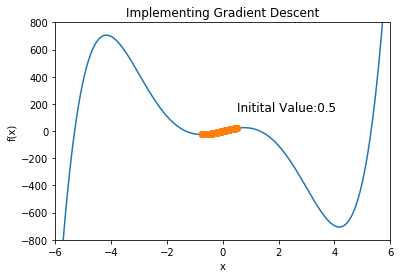

In [22]:
#generate some data so we can plot our results:
#y values for our gradient descent results:
y_steps = [ x**5 - 30*x**3 + 50*x for x in var_steps ]
#x values to plot the function
exes = [ x/100 for x in range( -1000, 1000, 1 ) ]
#y values to plot our funtion
whys = [ x**5 - 30*x**3 + 50*x for x in exes ]

#now to plot!
import matplotlib.pyplot as plt
plt.plot( exes, whys )
plt.plot( var_steps, y_steps, marker='o')
plt.ylabel( 'f(x)' )
plt.xlabel( 'x' )
plt.xlim( -6, 6 )
plt.ylim( -800, 800 )
plt.title( 'Implementing Gradient Descent' )
s = 'Initital Value:' + str( var0 )
plt.text(var0, 150, s, fontsize=12)
plt.show( )